In [1]:
#pip install citipy

In [2]:
#Imports and Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#check api_key
#weather_api_key

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [5]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
#Variables to request
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []

In [7]:
#Print Results
print("Beginning Data Retrieval")
print("------------------------")
#Iterative Request for Weather from cities
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {cities.index(city)} of Set 1 | {city}")
        
    except(KeyError,IndexError):
        print("City not found. Skipping...")
        #pass
    
print("------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------
Processing Record 0 of Set 1 | lake city
City not found. Skipping...
Processing Record 2 of Set 1 | necochea
Processing Record 3 of Set 1 | klyuchi
Processing Record 4 of Set 1 | laguna
Processing Record 5 of Set 1 | stykkisholmur
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | beloha
Processing Record 10 of Set 1 | bakchar
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | san jose
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | marsh harbour
City not found. Skipping...
Processing Record 19 of Set 1 | shankargarh
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | doha
Processing Record 22 of Set 1 | lorica
Processing Record 23 of

Processing Record 203 of Set 1 | miastko
Processing Record 204 of Set 1 | hilo
Processing Record 205 of Set 1 | ust-ilimsk
Processing Record 206 of Set 1 | boyolangu
Processing Record 207 of Set 1 | kapit
Processing Record 208 of Set 1 | victoria
City not found. Skipping...
Processing Record 210 of Set 1 | fairbanks
Processing Record 211 of Set 1 | lazaro cardenas
Processing Record 212 of Set 1 | manzhouli
Processing Record 213 of Set 1 | tiksi
Processing Record 214 of Set 1 | port keats
City not found. Skipping...
Processing Record 216 of Set 1 | zhigansk
City not found. Skipping...
Processing Record 218 of Set 1 | coquimbo
Processing Record 219 of Set 1 | chenghai
Processing Record 220 of Set 1 | kaduqli
Processing Record 221 of Set 1 | mistelbach
Processing Record 222 of Set 1 | arraial do cabo
Processing Record 223 of Set 1 | gold coast
City not found. Skipping...
Processing Record 225 of Set 1 | castro
Processing Record 226 of Set 1 | toro
Processing Record 227 of Set 1 | whitehor

Processing Record 406 of Set 1 | sulecin
Processing Record 407 of Set 1 | cabo san lucas
Processing Record 408 of Set 1 | mitsamiouli
Processing Record 409 of Set 1 | meadow lake
Processing Record 410 of Set 1 | lagos
Processing Record 411 of Set 1 | batagay-alyta
Processing Record 412 of Set 1 | tongren
Processing Record 413 of Set 1 | hervey bay
Processing Record 414 of Set 1 | severnoye
Processing Record 415 of Set 1 | kangshan
Processing Record 416 of Set 1 | the valley
Processing Record 417 of Set 1 | sroda wielkopolska
Processing Record 418 of Set 1 | dosso
Processing Record 419 of Set 1 | acaponeta
Processing Record 420 of Set 1 | egvekinot
Processing Record 421 of Set 1 | asau
City not found. Skipping...
Processing Record 423 of Set 1 | chik
Processing Record 424 of Set 1 | yar-sale
Processing Record 425 of Set 1 | bengkulu
Processing Record 426 of Set 1 | sao felix do xingu
Processing Record 427 of Set 1 | kirakira
Processing Record 428 of Set 1 | orlik
Processing Record 429 o

Processing Record 603 of Set 1 | fukue
Processing Record 604 of Set 1 | porto da folha
------------------------
Data Retrieval Complete


In [56]:
#Create data frame for weather in cities
weather_dict = ({"City":city_name,
                 "Latitude":lat,
                 "Longitude":lng,
                 "Max Temperature":max_temp,
                 "Humidity":humidity,
                 "Cloudiness":cloud,
                 "Wind Speed":wind_speed,
                 "Country":country,
                 "Date":date})

city_df = pd.DataFrame(weather_dict)
city_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lake City,30.19,-82.64,77.00,88,90,3.49,US,1595445985
1,Necochea,-38.55,-58.74,48.00,98,100,23.00,AR,1595446244
2,Klyuchi,52.27,79.17,60.15,71,0,5.37,RU,1595446244
3,Laguna,38.42,-121.42,79.00,44,1,13.87,US,1595445838
4,Stykkisholmur,65.08,-22.73,48.99,72,27,6.62,IS,1595446244
...,...,...,...,...,...,...,...,...,...
550,Novy Urengoy,66.08,76.63,50.88,71,5,15.75,RU,1595446390
551,George Town,5.41,100.34,78.80,94,40,2.24,MY,1595446391
552,Kousséri,12.08,15.03,80.60,78,20,5.82,CM,1595446391
553,Fukuechō,32.69,128.84,78.24,92,100,3.18,JP,1595446392


In [10]:
# Output File (CSV)
output_path = os.path.join("Output","cities.csv")
city_df.to_csv(output_path)


In [57]:
#Check for cities with humidity over 100%
humidity_outliers = city_df.loc[city_df["Humidity"]>100]
humidity_outliers


,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


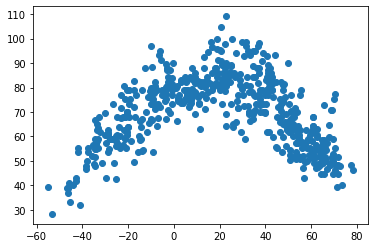

In [43]:
#Latitude versus Temperature Plot
plt.scatter(lat,max_temp)

#Format and Save Figure

plt.savefig("Output/Images/Lat_v_Temp.png")

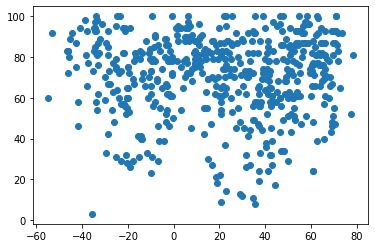

In [44]:
#Latitude versus Humidity Plot
plt.scatter(lat,humidity)

#Format and Save Figure

plt.savefig("Output/Images/Lat_v_Humidity.png")

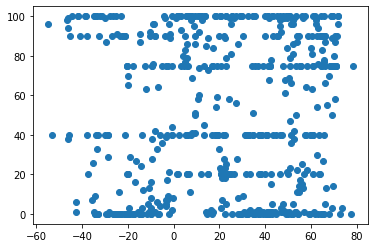

In [45]:
#Latitude versus Cloud Plot
plt.scatter(lat,cloud)

#Format and Save Figure

plt.savefig("Output/Images/Lat_v_Cloud.png")

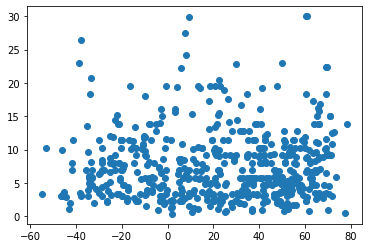

In [46]:
#Latitude versus Wind plot
plt.scatter(lat,wind_speed)

#Format and Save Figure

plt.savefig("Output/Images/Lat_v_Wind.png")

In [47]:
# Create Northern & Southern Hemisphere DataFrames
northern_df = city_df.loc[city_df["Latitude"] > 0]

southern_df = city_df.loc[city_df["Latitude"] <= 0]

In [18]:
n_lat = northern_df["Latitude"]
n_temp = northern_df["Max Temperature"]
n_humidity = northern_df["Humidity"]
n_cloud = northern_df["Cloudiness"]
n_wind = northern_df["Wind Speed"]

s_lat = southern_df["Latitude"]
s_temp = southern_df["Max Temperature"]
s_humidity = southern_df["Humidity"]
s_cloud = southern_df["Cloudiness"]
s_wind = southern_df["Wind Speed"]

R-squared is 1.20845931638959e-59


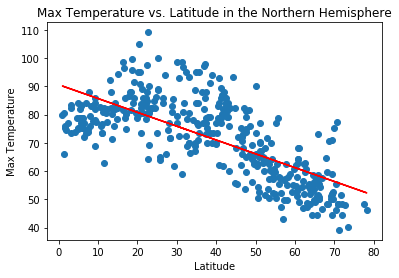

In [65]:
plt.scatter(n_lat, n_temp)
r0 = stats.pearsonr(n_lat, n_temp)
(slope0, intercept0, rvalue0, pvalue0, stderr0) = stats.linregress(n_lat, n_temp)
regress_values = n_lat * slope0 + intercept0
line_eq = "y = " + str(round(slope0,2)) + "x + " + str(round(intercept0,2))
plt.plot(n_lat,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Max Temperature vs. Latitude in the Northern Hemisphere")

print(f"R-squared is {r0[1]}")


#Save the figure to Images
plt.savefig("Output/Images/North_Temp_v_Lat.png")

R-squared is 1.8864250806229966e-41


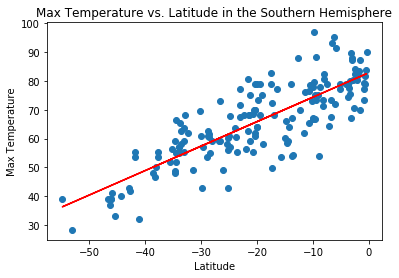

In [66]:
plt.scatter(s_lat, s_temp)
r1 = stats.pearsonr(s_lat, s_temp)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_lat,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Max Temperature vs. Latitude in the Southern Hemisphere")

print(f"R-squared is {r1[1]}")

#Save the figure to Images
plt.savefig("Output/Images/South_Temp_v_Lat.png")

R-squared is 0.6819148362286804


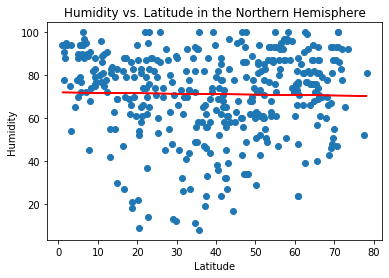

In [67]:
plt.scatter(n_lat, n_humidity)

r2 = stats.pearsonr(n_lat, n_humidity)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_lat, n_humidity)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_lat,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude in the Northern Hemisphere")

print(f"R-squared is {r2[1]}")

#Save the figure to Images
plt.savefig("Output/Images/North_Hum_v_Lat.png")

R-squared is 0.011593608541025946


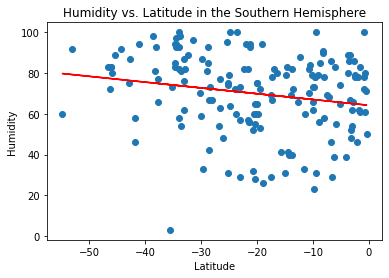

In [68]:
plt.scatter(s_lat, s_humidity)

r3 = stats.pearsonr(s_lat, s_humidity)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_lat, s_humidity)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_lat,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude in the Southern Hemisphere")

print(f"R-squared is {r3[1]}")

#Save the figure to Images
plt.savefig("Output/Images/South_Hum_v_Lat.png")

R-squared is 0.5601070207342216


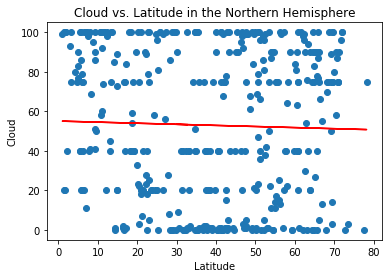

In [73]:
plt.scatter(n_lat, n_cloud)

r4 = stats.pearsonr(n_lat, n_cloud)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_lat, n_cloud)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_lat,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloud")
plt.title("Cloud vs. Latitude in the Northern Hemisphere")

print(f"R-squared is {r4[1]}")

#Save the figure to Images
plt.savefig("Output/Images/North_Cloud_v_Lat.png")

R-squared is 0.09303751096407223


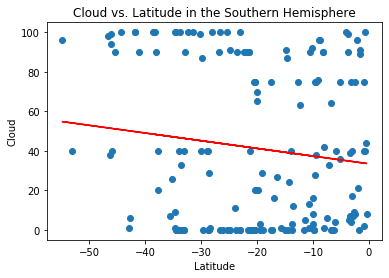

In [74]:
plt.scatter(s_lat, s_cloud)

r5 = stats.pearsonr(s_lat, s_cloud)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_lat,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloud")
plt.title("Cloud vs. Latitude in the Southern Hemisphere")

print(f"R-squared is {r5[1]}")

#Save the figure to Images
plt.savefig("Output/Images/South_Cloud_v_Lat.png")

R-squared is 0.391045628910927


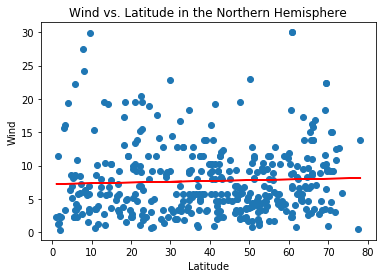

In [75]:
plt.scatter(n_lat, n_wind)

r6 = stats.pearsonr(n_lat, n_wind)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_lat, n_wind)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_lat,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title("Wind vs. Latitude in the Northern Hemisphere")

print(f"R-squared is {r6[1]}")

#Save the figure to Images
plt.savefig("Output/Images/North_Wind_v_Lat.png")

R-squared is 0.507395646762129


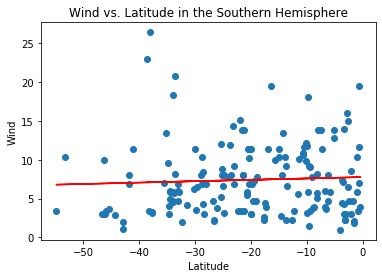

In [76]:
plt.scatter(s_lat, s_wind)

r7 = stats.pearsonr(s_lat, s_wind)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_lat, s_wind)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_lat,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title("Wind vs. Latitude in the Southern Hemisphere")

print(f"R-squared is {r7[1]}")

#Save the figure to Images
plt.savefig("Output/Images/South_Wind_v_Lat.png")

# Analysis

1) As shown by their respective slopes, there is a negative relationship between latitude and temperature in the Northern Hempisphere and a positive relationship in the Southern Hemisphere. This confirms our hypothesis that the temperature will be warmer closer to the equator. 

2) Linear regression is probably not the best  model for most of the relationships graphed in this assignment. The R-squared values are very low to moderate. This is reflected in the graphs (particularly those for cloud and humidity) where the regression lines were not near the bulk of the data points). It is then important to note that certain weather phenomenon, such as cloudiness and humidity have other determinants than distance from the equator. For example, proximity to bodies of water and wind currents. 

3) The data in the Northern Hemisphere appears more spread out and random than the data for the Southern Hemisphere. It appears that there may be more fluctuation and/or variation in summer weather for the Northern Hemisphere than there is in winter weather for the Southern. 